# Thêm những thư viện cần thiết

In [1]:
import pandas as pd # thư viện làm việc với bảng
import numpy as np # thư viện tính toán trên ma trận số 
from collections import defaultdict # dictionary có giá trị default
from collections import Counter # hàm đếm tạo thành dictionary
import matplotlib.pyplot as plt # thư viện vẽ biểu đồ matplotlib
plt.style.use('ggplot') # chỉnh theme cho biểu đồ
import seaborn as sns # thư viện vẽ biểu đồ, đẹp hơn matplotlib

In [2]:
figsize = (15, 7)

# Load dữ liệu

In [3]:
df = pd.read_csv('Pokemon.csv').drop('#', axis=1)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# Thông tin cơ bản của bộ dữ liệu

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [5]:
df['Type 2'].fillna('', inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      800 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [8]:
df[df['Name'].str.contains('Mega')]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
12,BlastoiseMega Blastoise,Water,,630,79,103,120,135,115,78,1,False
19,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
23,PidgeotMega Pidgeot,Normal,Flying,579,83,80,80,135,80,121,1,False
71,AlakazamMega Alakazam,Psychic,,590,55,50,65,175,95,150,1,False
87,SlowbroMega Slowbro,Water,Psychic,590,95,75,180,130,80,30,1,False
102,GengarMega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False
124,KangaskhanMega Kangaskhan,Normal,,590,105,125,100,60,100,100,1,False


In [9]:
df['Name'] = df['Name'].str.replace('.*(?=Mega)', '')

<ipython-input-9-0e47e45bee9d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Name'] = df['Name'].str.replace('.*(?=Mega)', '')


In [10]:
df[df['Name'].str.contains('Mega')]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
12,Mega Blastoise,Water,,630,79,103,120,135,115,78,1,False
19,Mega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
23,Mega Pidgeot,Normal,Flying,579,83,80,80,135,80,121,1,False
71,Mega Alakazam,Psychic,,590,55,50,65,175,95,150,1,False
87,Mega Slowbro,Water,Psychic,590,95,75,180,130,80,30,1,False
102,Mega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False
124,Mega Kangaskhan,Normal,,590,105,125,100,60,100,100,1,False


# Giá trị trung tâm
### Mode, Median và Mean

![mmm](assets/mmm.png)

In [11]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


# Boxplot
![boxplot](assets/boxplot.png)

### Quan sát boxplot của các thuộc tính của các Pokemon

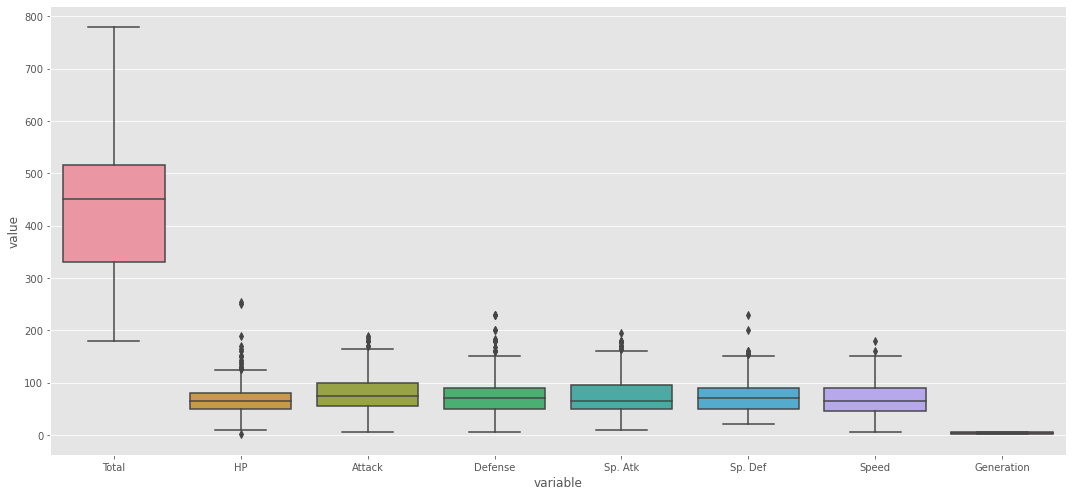

In [12]:
fig, ax = plt.subplots(figsize=figsize)
sns.boxplot(data=df.iloc[:, 3:-1].melt(), x='variable', y='value')
plt.tight_layout()
plt.show()

#### Câu hỏi:
- Có phải tất cả các điểm outlier đều là của pokemon `Legendary` hay không?

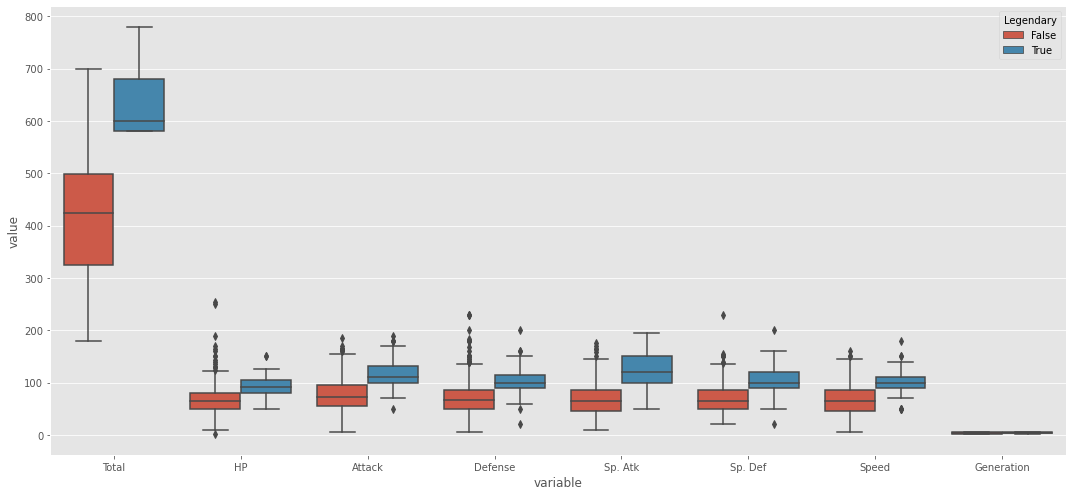

In [13]:
fig, ax = plt.subplots(figsize=figsize)
sns.boxplot(data=df.iloc[:, 3:].melt(id_vars='Legendary'), x='variable', y='value', hue='Legendary')
plt.tight_layout()
plt.show()

# Histogram

![histogram](assets/hist.jpg)

#### Câu hỏi:
- Phân phối `HP` như thế nào?

In [14]:
def plot(data, x, is_hist=True, **kwargs):
    plt.figure(figsize=figsize)
    if is_hist:
        sns.histplot(data=data, x=x, **kwargs)
        plt.axvline(data[x].mean(), ls='-.', c='blue', lw=4, label='mean')
        plt.axvline(data[x].median(), ls='-.', c='red', lw=4, label='median')
    else:
        sns.boxplot(data=data, x=x, **kwargs)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

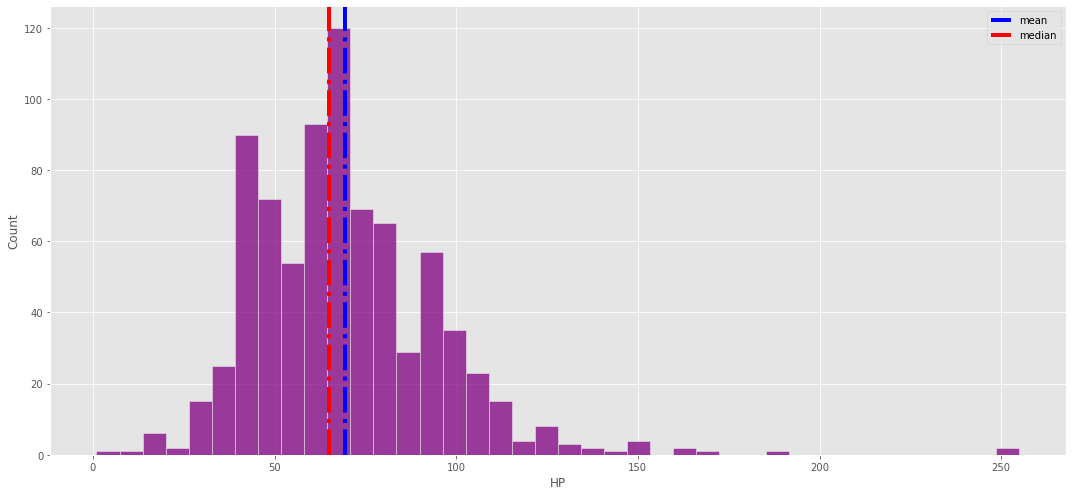

In [15]:
plot(df, 'HP', color='purple')

- Phân phối của `Attack`

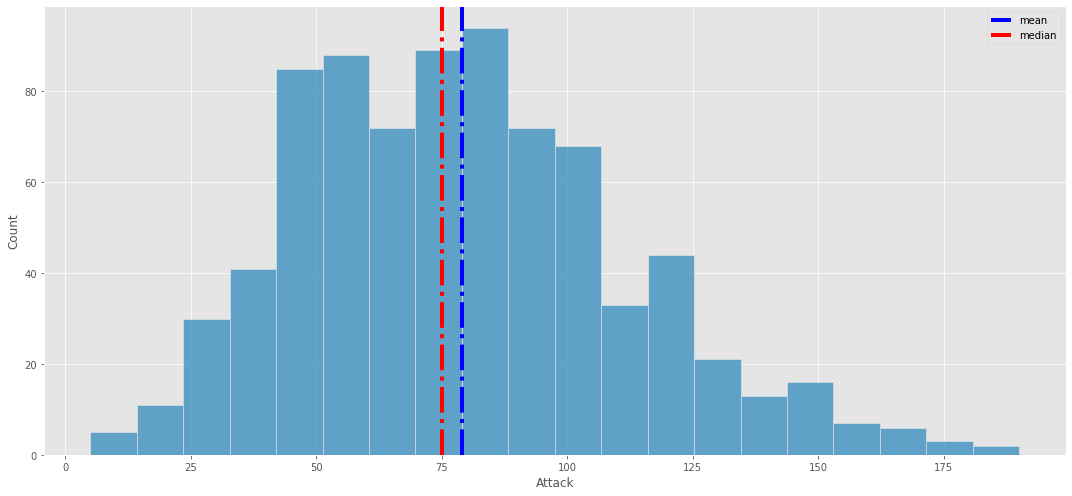

In [16]:
plot(df, 'Attack')

# Bar chart và Histogram

#### Câu hỏi:
- Tại sao không sử dụng bar chart thay vì histogram?

![bar vs hist](assets/hist_vs_bar.png)

# Bar chart

#### Câu hỏi:
- Số lượng mỗi hệ của các pokemon như thế nào?

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Type 1,Flying,Fairy,Ice,Fighting,Steel,Poison,Dark,Ghost,Dragon,Ground,Electric,Rock,Fire,Psychic,Bug,Grass,Normal,Water
Name,4,17,24,27,27,28,31,32,32,32,44,44,52,57,69,70,98,112


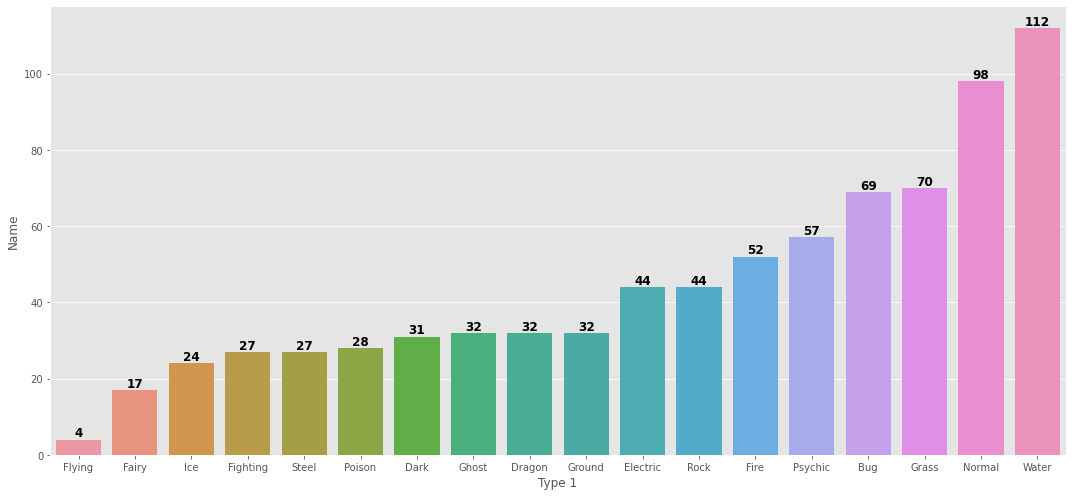

In [17]:
data = df.groupby('Type 1')['Name'].count().reset_index().sort_values(by='Name').reset_index(drop=True)
display(data.T)

fig, ax = plt.subplots(figsize=figsize)
g = sns.barplot(data=data, x='Type 1', y='Name', ax=ax)
for p in g.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        fontsize=12, va='bottom', ha='center', fontweight='bold'
    )
plt.tight_layout()
plt.show()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Type 2,Bug,Normal,Electric,Fire,Ghost,Rock,Ice,Water,Dragon,Dark,Steel,Fairy,Grass,Fighting,Psychic,Poison,Ground,Flying,
Name,3,4,6,12,14,14,14,14,18,20,22,23,25,26,33,34,35,97,386


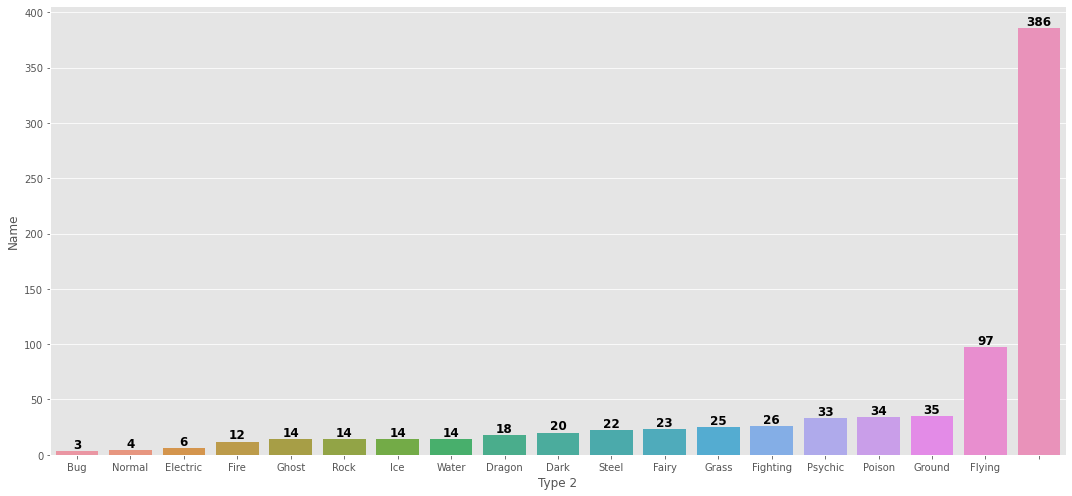

In [18]:
data = df.groupby('Type 2')['Name'].count().reset_index().sort_values(by='Name').reset_index(drop=True)
display(data.T)
fig, ax = plt.subplots(figsize=figsize)
g = sns.barplot(data=data, x='Type 2', y='Name', ax=ax)
for p in g.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        fontsize=12, va='bottom', ha='center', fontweight='bold'
    )
plt.tight_layout()
plt.show()

# Pie chart

![pie](assets/pie.jpg)

### Sử dụng pie chart không phù hợp

In [19]:
# kích cỡ chung cho biểu đồ
pie_shape = (15, 6)

#### Câu hỏi:
- Tỉ lệ của các hệ trong Pokemon như thế nào?

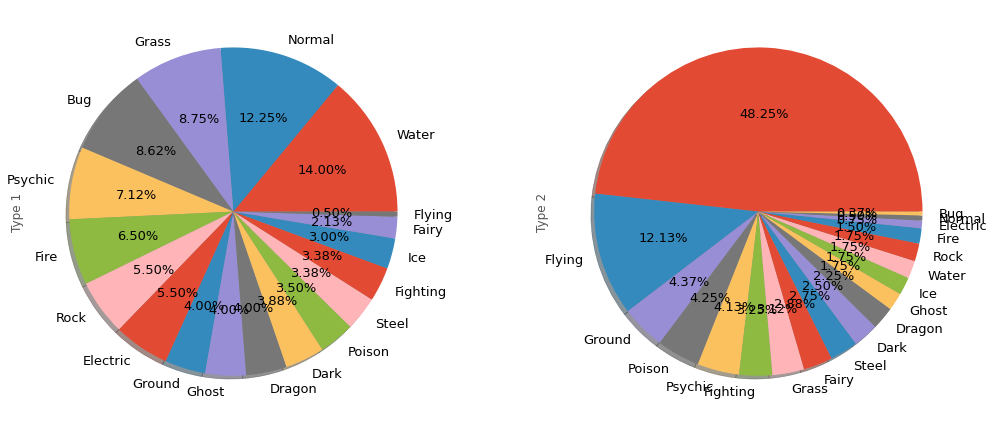

In [20]:
fig, ax = plt.subplots(1, 2, figsize=pie_shape)
df['Type 1'].value_counts().plot(kind='pie', autopct='%.2f%%', fontsize=13, shadow=True, ax=ax[0])
df['Type 2'].value_counts().plot(kind='pie', autopct='%.2f%%', fontsize=13, shadow=True, ax=ax[1])
plt.tight_layout()
plt.show()

## $\rightarrow$ Cách sử dụng pie chart chưa hợp lí.

### Khắc phục: Sử dụng bar chart hoặc giảm bớt số lượng thuộc tính.

## Sử dụng pie chart phù hợp

**$\rightarrow$ Ít thuộc tính**

#### Câu hỏi:
- Số lượng Pokemon của các thế hệ có tỉ lệ như thế nào?

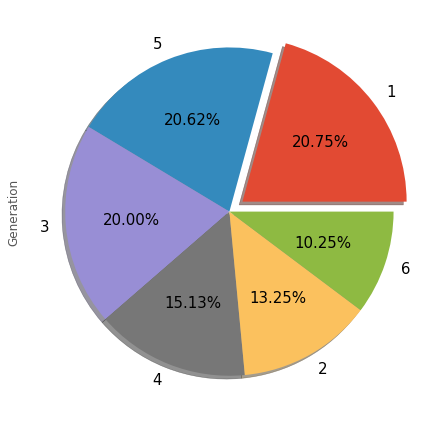

In [21]:
plt.figure(figsize=pie_shape)
df['Generation'].value_counts().plot(kind='pie', autopct='%.2f%%', fontsize=15, shadow=True, explode=[0.1, 0, 0, 0, 0, 0])
plt.tight_layout()
plt.show()

# Scatter

![scatter](assets/scatter.gif)

#### Câu hỏi:
- Tấn công và phòng thủ cơ bản có mối liên hệ như thế nào?

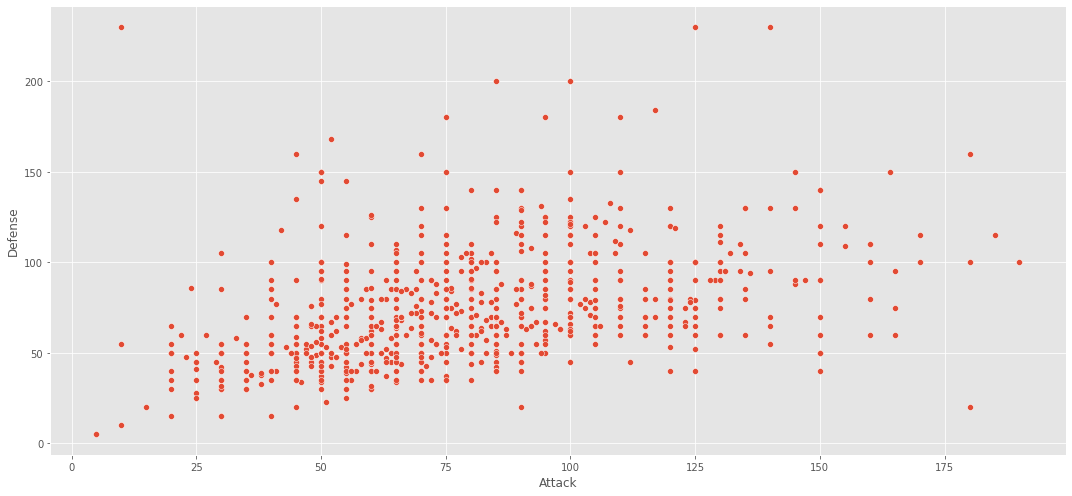

In [22]:
plt.figure(figsize=figsize)
sns.scatterplot(data=df, x='Attack', y='Defense')
plt.tight_layout()
plt.show()

# Correlation - mối tương quan giữa hai thuộc tính

![corr_gif](assets/pearson.gif)

### $Correlation \in [-1, 1]$

![corr](assets/corr_dir.png)

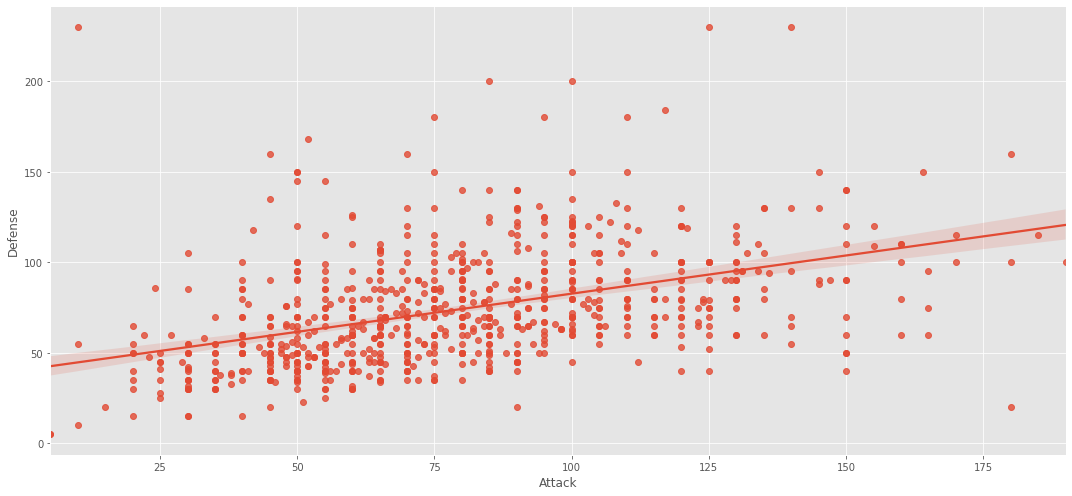

In [23]:
plt.figure(figsize=figsize)
sns.regplot(data=df, x='Attack', y='Defense')
plt.tight_layout()
plt.show()

In [24]:
x = df['Attack']
y = df['Defense']
x.corr(y)

0.4386870551184895

![corr](assets/corr.png)

# Heatmap

In [25]:
df.corr()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


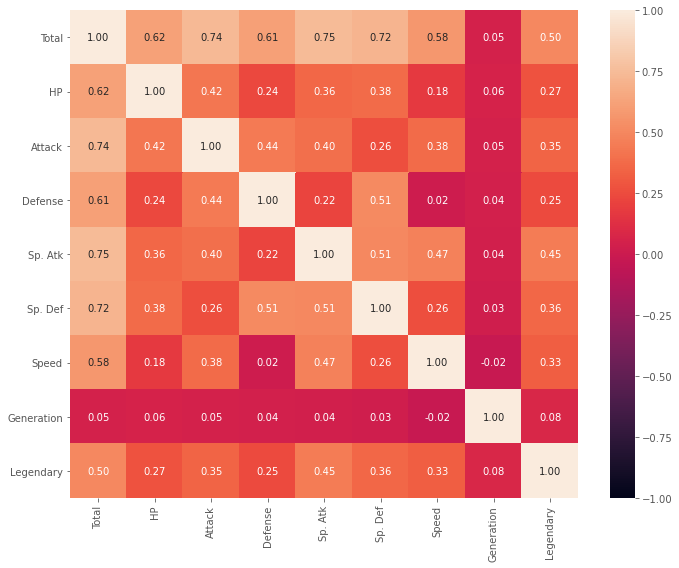

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=df.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.tight_layout()
plt.show()

# Lineplot

#### Câu hỏi:
- Số lượng Pokemon mỗi thế hệ như thế nào?

In [27]:
data = df['Generation'].value_counts().reset_index().rename(columns={'Generation': 'count', 'index': 'Generation'})
data.sort_values(by='Generation', inplace=True)
data

,Generation,count
0,1,166
4,2,106
2,3,160
3,4,121
1,5,165
5,6,82


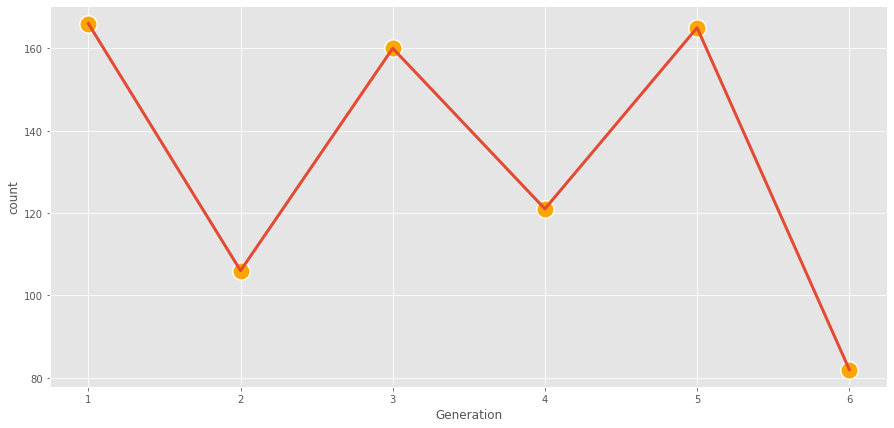

In [28]:
plt.figure(figsize=figsize)
sns.lineplot(data=data, x='Generation', y='count', lw=3)
sns.scatterplot(data=data, x='Generation', y='count', s=300, color='orange')
plt.show()

# Barchart Race

In [29]:
from IPython.display import HTML
HTML('<iframe width="1000" height="500" src="https://www.youtube.com/embed/HY9D42M_0d8" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

C:\Users\nvatu\anaconda3\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# Khám phá dữ liệu

#### Câu hỏi:
- Làm thế nào để xem số lượng của các Pokemon có 1 hoặc 2 hệ như thế nào?

In [30]:
corr_dict = defaultdict(dict)
for t1 in set(df['Type 1'].unique()):
    for t2 in set(df['Type 2'].unique()):
        corr_dict[t1][t2] = df[(df['Type 1'] == t1) & (df['Type 2'] == t2)]['Name'].count()
data = pd.DataFrame(corr_dict)

mask = np.zeros_like(data)
mask[data == 0] = True

In [31]:
data

,Rock,Ice,Normal,Flying,Grass,Psychic,Ghost,Dragon,Water,Dark,Electric,Bug,Poison,Fire,Fairy,Ground,Fighting,Steel
,9,13,61,2,33,38,10,11,59,10,27,17,15,28,15,13,20,5
Ice,2,0,0,0,3,0,0,3,3,2,1,0,0,0,0,0,0,0
Steel,3,0,0,0,2,0,0,0,1,2,3,7,0,1,0,1,2,0
Rock,0,0,0,0,0,0,0,0,4,0,0,3,0,1,0,3,0,3
Normal,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0
Grass,2,0,2,0,0,1,10,0,3,0,1,6,0,0,0,0,0,0
Psychic,2,2,2,0,2,0,0,4,5,2,0,0,0,2,0,2,3,7
Water,6,3,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0
Dark,2,0,0,0,3,1,1,0,6,0,0,0,3,0,0,3,1,0
Bug,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


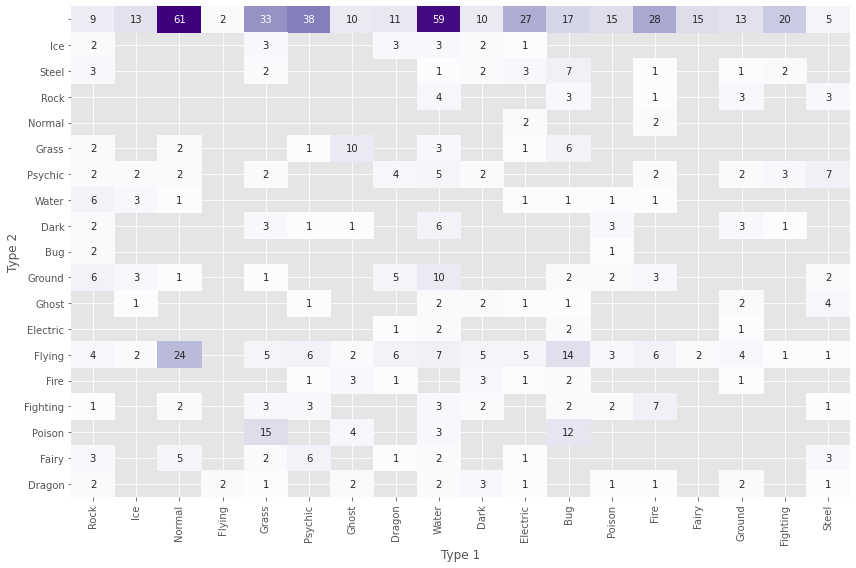

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(data=data, annot=True, fmt='d', mask=mask, cmap='Purples', cbar=False)
plt.xlabel('Type 1', fontsize=12)
plt.ylabel('Type 2', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

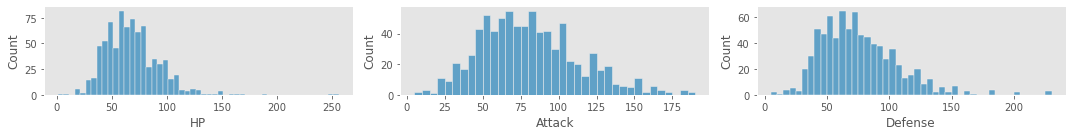

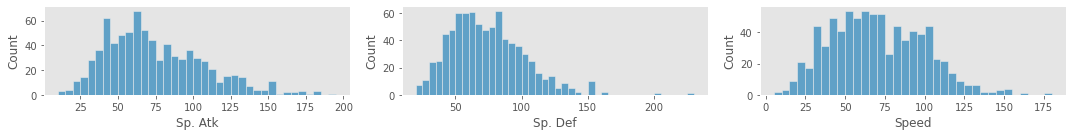

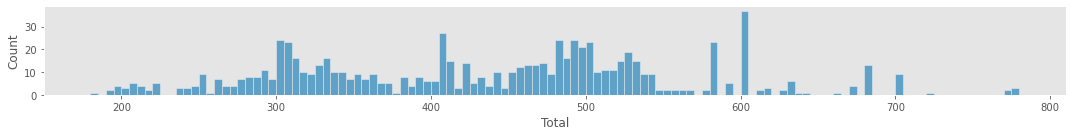

In [33]:
hist_figsize = (15, 2)
binwidth = 5
f, ax = plt.subplots(1, 3, sharey=False, figsize=hist_figsize)
sns.histplot(data=df['HP'], ax=ax[0], binwidth=binwidth)
sns.histplot(data=df['Attack'], ax=ax[1], binwidth=binwidth)
sns.histplot(data=df['Defense'], ax=ax[2], binwidth=binwidth)
for i in range(3):
    ax[i].grid(False)
f.tight_layout()
    
f, ax = plt.subplots(1, 3, sharey=False, figsize=hist_figsize)
sns.histplot(data=df['Sp. Atk'], ax=ax[0], binwidth=binwidth)
sns.histplot(data=df['Sp. Def'], ax=ax[1], binwidth=binwidth)
sns.histplot(data=df['Speed'], ax=ax[2], binwidth=binwidth)
for i in range(3):
    ax[i].grid(False)
f.tight_layout()
    
f, ax = plt.subplots(figsize=hist_figsize)
sns.histplot(data=df['Total'], ax=ax, binwidth=binwidth)
ax.grid(False)
f.tight_layout()
plt.show()

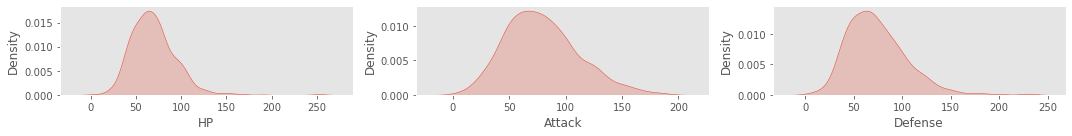

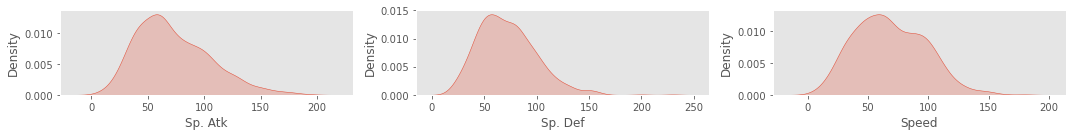

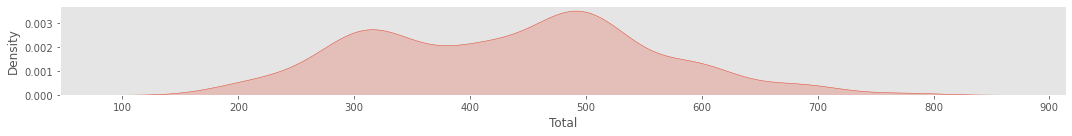

In [34]:
hist_figsize = (15, 2)
binwidth = 5

f, ax = plt.subplots(1, 3, sharey=False, figsize=hist_figsize)
sns.kdeplot(df['HP'], ax=ax[0], fill=True)
sns.kdeplot(data=df['Attack'], ax=ax[1], fill=True)
sns.kdeplot(data=df['Defense'], ax=ax[2], fill=True)
f.tight_layout()
for i in range(3):
    ax[i].grid(False)
    
f, ax = plt.subplots(1, 3, sharey=False, figsize=hist_figsize)
sns.kdeplot(data=df['Sp. Atk'], ax=ax[0], fill=True)
sns.kdeplot(data=df['Sp. Def'], ax=ax[1], fill=True)
sns.kdeplot(data=df['Speed'], ax=ax[2], fill=True)
f.tight_layout()

for i in range(3):
    ax[i].grid(False)
f, ax = plt.subplots(figsize=hist_figsize)
sns.kdeplot(data=df['Total'], ax=ax, fill=True)
ax.grid(False)
f.tight_layout()

plt.show()

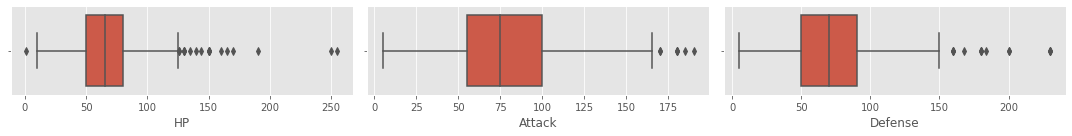

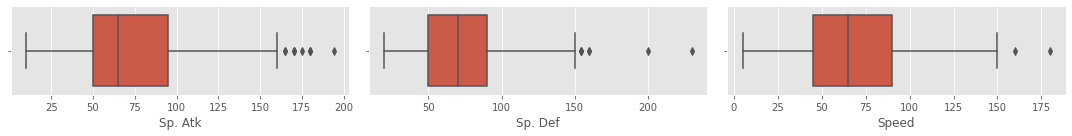

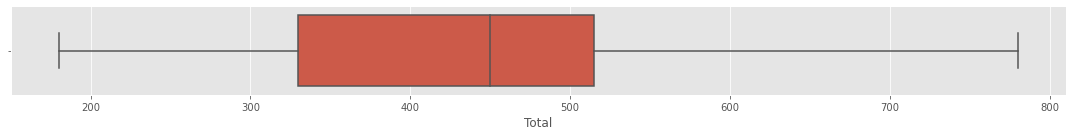

In [35]:
hist_figsize = (15, 2)
binwidth = 5
f, ax = plt.subplots(1, 3, sharey=True, figsize=hist_figsize)
sns.boxplot(data=df, ax=ax[0], x='HP')
sns.boxplot(data=df, ax=ax[1], x='Attack')
sns.boxplot(data=df, ax=ax[2], x='Defense')
f.tight_layout()

f, ax = plt.subplots(1, 3, sharey=True, figsize=hist_figsize)
sns.boxplot(data=df, ax=ax[0], x='Sp. Atk')
sns.boxplot(data=df, ax=ax[1], x='Sp. Def')
sns.boxplot(data=df, ax=ax[2], x='Speed')
f.tight_layout()

f, ax = plt.subplots(figsize=hist_figsize)
sns.boxplot(data=df, ax=ax, x='Total')
f.tight_layout()

plt.show()

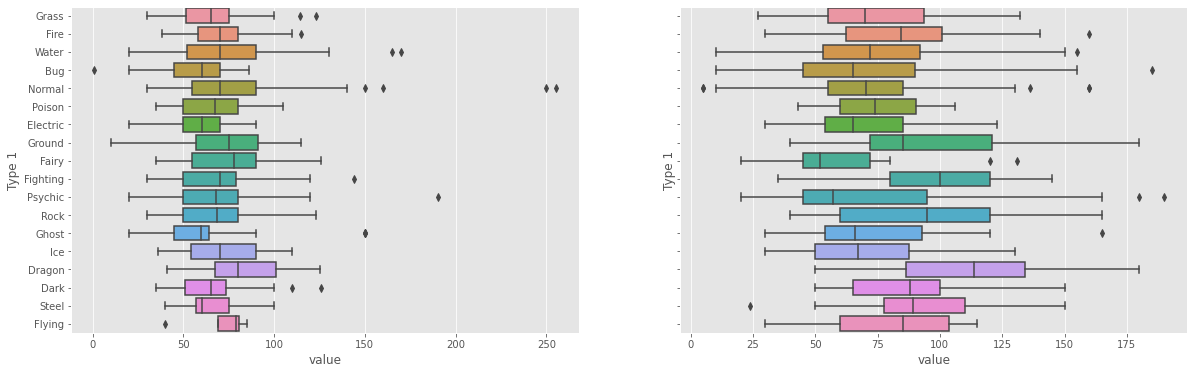

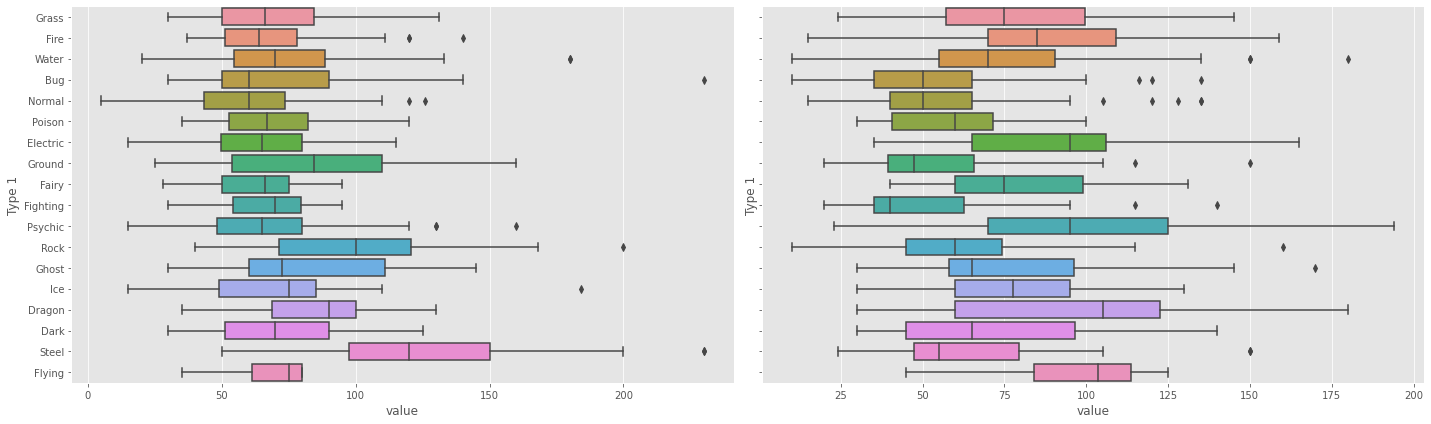

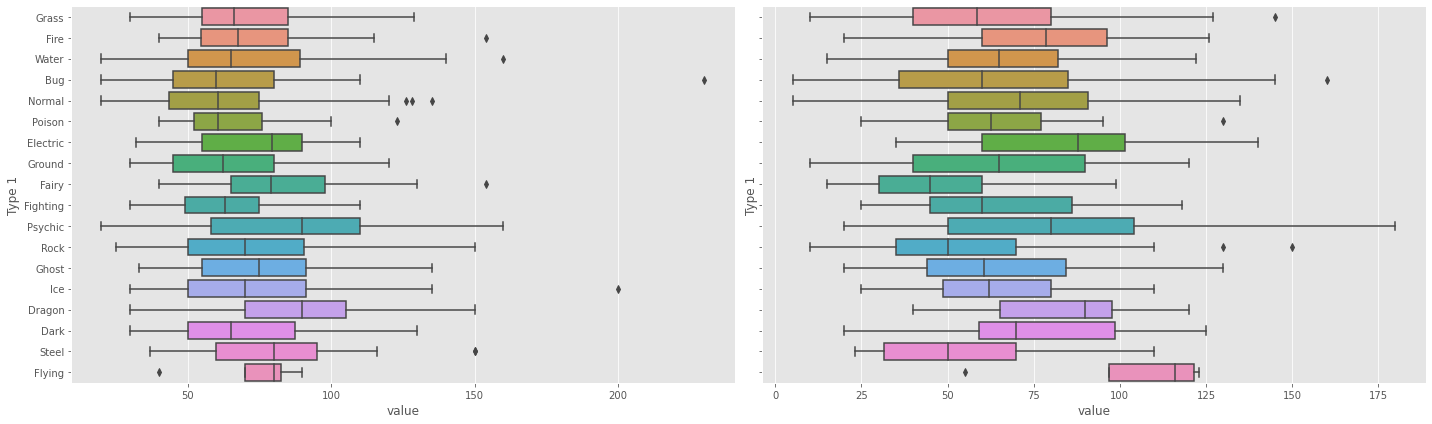

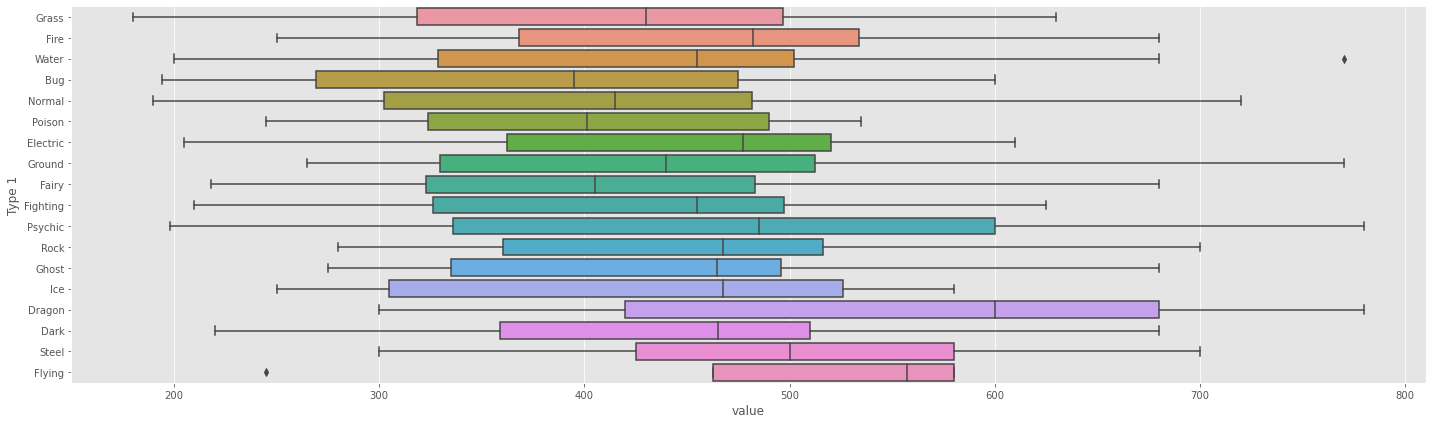

In [36]:
boxplot_figsize = (20, 6)
fig, ax = plt.subplots(1, 2, figsize=boxplot_figsize, sharey=True)
sns.boxplot(data=df.melt(id_vars=['Type 1'], value_vars=['HP']), y='Type 1', x='value', ax=ax[0])
sns.boxplot(data=df.melt(id_vars=['Type 1'], value_vars=['Attack']), y='Type 1', x='value', ax=ax[1])

fig, ax = plt.subplots(1, 2, figsize=boxplot_figsize, sharey=True)
sns.boxplot(data=df.melt(id_vars=['Type 1'], value_vars=['Defense']), y='Type 1', x='value', ax=ax[0])
sns.boxplot(data=df.melt(id_vars=['Type 1'], value_vars=['Sp. Atk']), y='Type 1', x='value', ax=ax[1])
fig.tight_layout()

fig, ax = plt.subplots(1, 2, figsize=boxplot_figsize, sharey=True)
sns.boxplot(data=df.melt(id_vars=['Type 1'], value_vars=['Sp. Def']), y='Type 1', x='value', ax=ax[0])
sns.boxplot(data=df.melt(id_vars=['Type 1'], value_vars=['Speed']), y='Type 1', x='value', ax=ax[1])
fig.tight_layout()

fig, ax = plt.subplots(figsize=boxplot_figsize)
sns.boxplot(data=df.melt(id_vars=['Type 1'], value_vars=['Total']), y='Type 1', x='value', ax=ax)
fig.tight_layout()

plt.show()

In [37]:
def plot_bar(df, name, title):
    data = df.sort_values(by=name, ascending=False).head(10)
    fig, ax = plt.subplots(figsize=(6, 6))
    g = sns.barplot(data=data, y='Name', x=name)
    for p in g.patches:
        ax.annotate(
            format(p.get_width(), '.0f'),
            (p.get_height() + p.get_width(), p.get_y()),
            ha='left', va='top'
        )
    plt.title(title)
    plt.show()
    return list(data['Name'].values)

# Top 10 Pokemon của những chỉ số
### Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed

In [38]:
top_of_tops = []

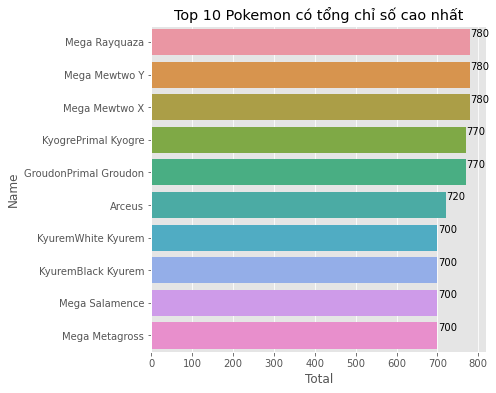

In [39]:
top_of_tops += plot_bar(df, name='Total', title='Top 10 Pokemon có tổng chỉ số cao nhất')

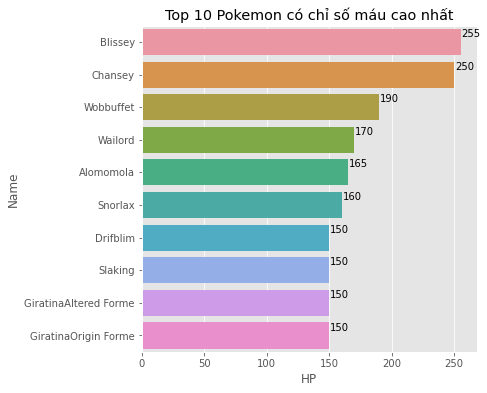

In [40]:
top_of_tops += plot_bar(df, name='HP', title='Top 10 Pokemon có chỉ số máu cao nhất')

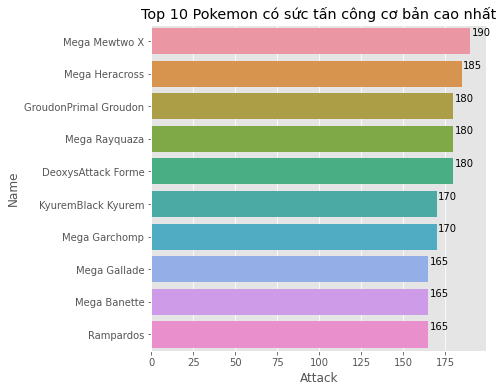

In [41]:
top_of_tops += plot_bar(df, name='Attack', title='Top 10 Pokemon có sức tấn công cơ bản cao nhất')

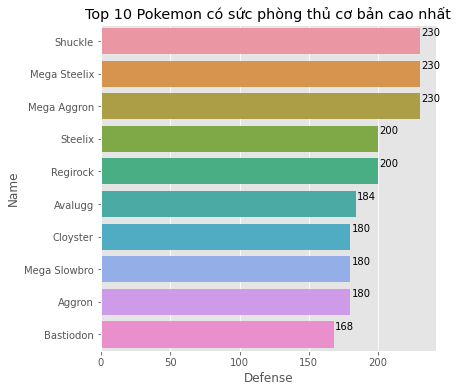

In [42]:
top_of_tops += plot_bar(df, name='Defense', title='Top 10 Pokemon có sức phòng thủ cơ bản cao nhất')

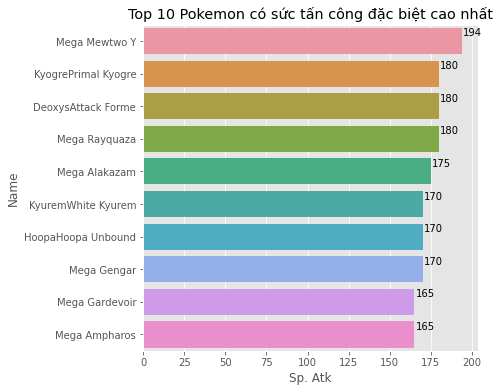

In [43]:
top_of_tops += plot_bar(df, name='Sp. Atk', title='Top 10 Pokemon có sức tấn công đặc biệt cao nhất')

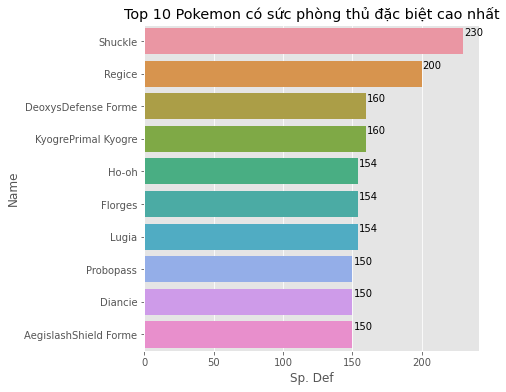

In [44]:
top_of_tops += plot_bar(df, name='Sp. Def', title='Top 10 Pokemon có sức phòng thủ đặc biệt cao nhất')

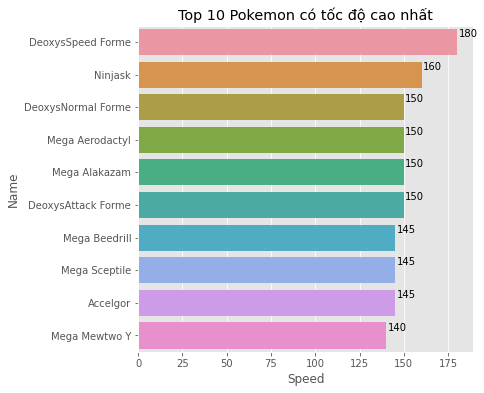

In [45]:
top_of_tops += plot_bar(df, name='Speed', title='Top 10 Pokemon có tốc độ cao nhất')

In [46]:
top_of_top_df = pd.DataFrame(Counter(top_of_tops).items(), columns=['Name', 'Count']).sort_values(by='Count', ascending=False)
top_of_top_df.head(10)

,Name,Count
0,Mega Rayquaza,3
3,KyogrePrimal Kyogre,3
21,DeoxysAttack Forme,3
1,Mega Mewtwo Y,3
4,GroudonPrimal Groudon,2
6,KyuremWhite Kyurem,2
7,KyuremBlack Kyurem,2
36,Mega Alakazam,2
26,Shuckle,2
2,Mega Mewtwo X,2


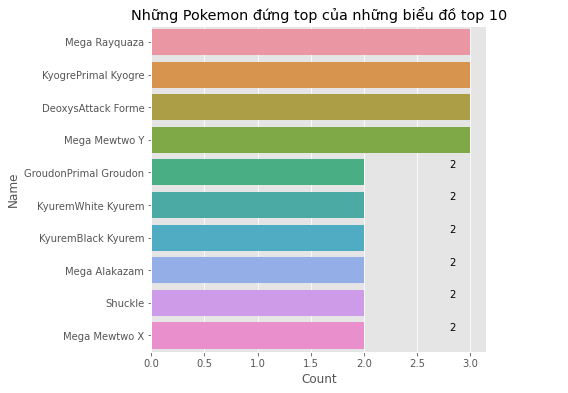

['Mega Rayquaza',
 'KyogrePrimal Kyogre',
 'DeoxysAttack Forme',
 'Mega Mewtwo Y',
 'GroudonPrimal Groudon',
 'KyuremWhite Kyurem',
 'KyuremBlack Kyurem',
 'Mega Alakazam',
 'Shuckle',
 'Mega Mewtwo X']

In [47]:
plot_bar(top_of_top_df.head(10), name='Count', title='Những Pokemon đứng top của những biểu đồ top 10')

In [48]:
def plot_radar(name, fig, axis=111):
    index = df[df['Name'] == name].index[0]
    labels=np.array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])
    stats=df.loc[index, labels].values

    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    # close the plot
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    labels = np.concatenate((labels, [labels[0]]))
    
    ax = fig.add_subplot(axis, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels, fontsize=12, fontweight='bold')
    ax.set_title(name)
    ax.grid(True)
    
    return fig

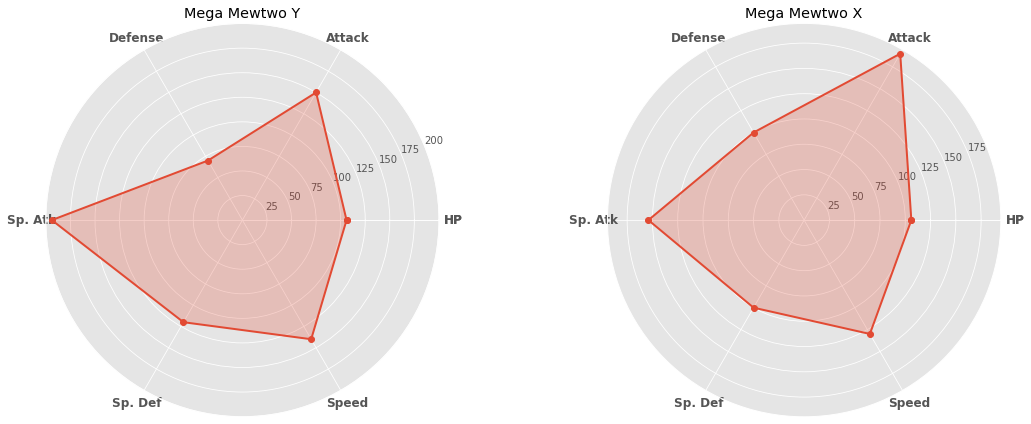

In [49]:
fig = plt.figure(figsize=(16, 6))
fig = plot_radar('Mega Mewtwo Y', fig, axis=121)
fig = plot_radar('Mega Mewtwo X', fig, axis=122)
fig.tight_layout()
plt.show()

### Câu chuyện đặt ra:

Bạn được giao một nhiệm vụ giúp đỡ cậu bé Satoshi, một cậu bé mới lớn 10 tuổi, đang đi trên con đường trở thành nhà huấn luyện Pokemon chuyên nghiệp.

![satoshi](assets/satoshi.png)

Và bác giáo sư cho phép cậu bé chọn một trong 3 pokemon dưới đây, lần lượt là Bulbasaur, Charmander, Squirtle 

![3start](assets/3start.jpg)

Satoshi đang phân vân một trong 3 Pokemon này, đang mong muốn nhận lời khuyên từ bạn, một nhà khoa học dữ liệu chuyên nghiệp. Bằng những kiến thức khám phá dữ liệu từ nãy đến giờ, nếu là bạn, bạn sẽ chọn Pokemon nào trong 3 Pokemon trên để Satoshi có thể vững bước trên con đường trở thành Pokemon Trainer chuyên nghiệp.

# Bulbasaur

![saur](assets/evolution_saur.png)

In [50]:
def plot_series_radar(names):
    labels=np.array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    angles=np.concatenate((angles,[angles[0]]))
    labels = np.concatenate((labels, [labels[0]]))

    indexes = []
    stats = []
    for name in names:
        indexes.append(df[df['Name'] == name].index[0])
        stats.append(list(df.loc[indexes[-1], labels].values))

    stats = [stat + stat[0] for stat in stats]

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12), subplot_kw=dict(polar=True))

    for stat, name in zip(stats, names):
        ax.plot(angles, stat, 'o-', linewidth=2, label=name)
        ax.fill(angles, stat, alpha=0.25)

    ax.set_thetagrids(angles * 180/np.pi, labels, fontsize=12, fontweight='bold')
    # ax.set_title(name)
    ax.grid(True)
    plt.legend(loc='center')
    ax.set_title('Radar của %s' % (', '.join(names)))
    plt.show()

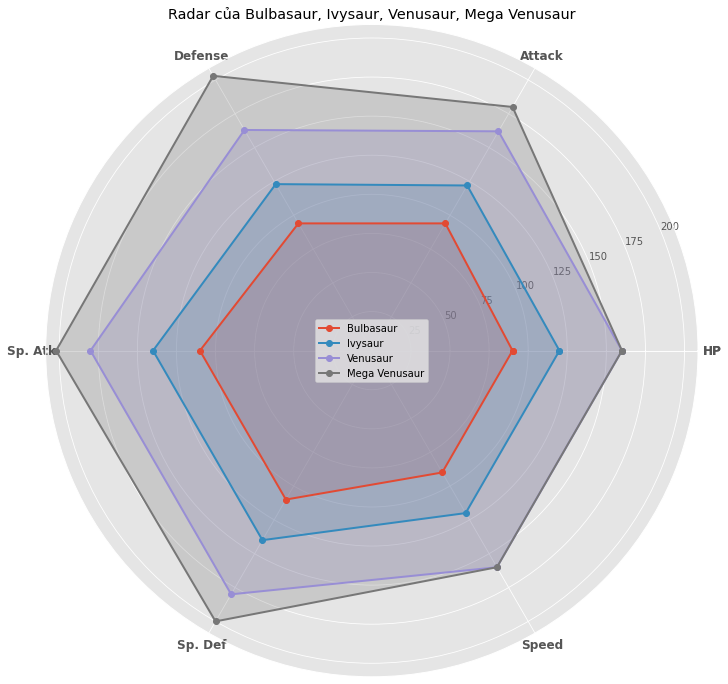

In [51]:
bulbasaur_names = ['Bulbasaur', 'Ivysaur', 'Venusaur', 'Mega Venusaur']
plot_series_radar(bulbasaur_names)

# Charmander

![chamander](assets/chamander.jpg)

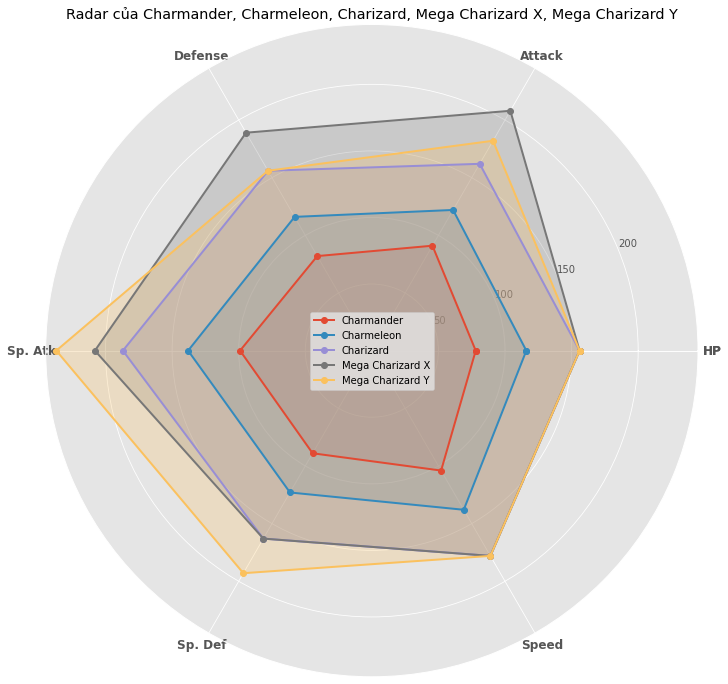

In [52]:
charmander_names = ['Charmander', 'Charmeleon', 'Charizard', 'Mega Charizard X', 'Mega Charizard Y']
plot_series_radar(charmander_names)

# Squirtle
![squirtle](assets/squirtle.jpg)

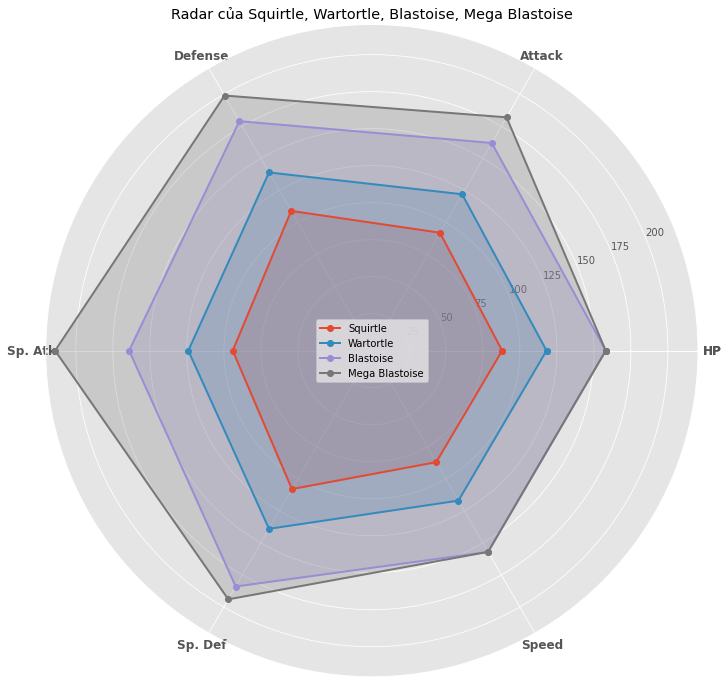

In [53]:
squirtle_names = ['Squirtle', 'Wartortle', 'Blastoise', 'Mega Blastoise']
plot_series_radar(squirtle_names)

## Bằng những phân tích vừa rồi và cuối cùng, Satoshi đã chọn ...

![satoshi_pikachu](assets/satoshi_pikachu.png)